In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

from sklearn.decomposition import PCA

%matplotlib inline

data = 'data/random_forest_data.csv'

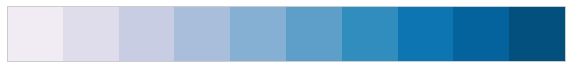

In [48]:
blues = sns.palplot(sns.color_palette("PuBu", 10))
sns.set_palette(blues)
plt.show()
#sns.palplot(sns.color_palette())


In [5]:
df = pd.read_csv(data, low_memory=False)

In [6]:
df.shape

(132819, 31)

In [7]:
df.isnull().sum()

Unnamed: 0                  0
x                           0
y                           0
majorinjuries_bicyclist     0
minorinjuries_bicyclist     0
fatal_bicyclist             0
majorinjuries_driver        0
minorinjuries_driver        0
fatal_driver                0
majorinjuries_pedestrian    0
minorinjuries_pedestrian    0
fatal_pedestrian            0
total_vehicles              0
total_bicycles              0
total_pedestrians           0
pedestriansimpaired         0
bicyclistsimpaired          0
driversimpaired             0
total_taxis                 0
total_government            0
speeding_involved           0
offintersection             0
intapproachdirection        0
ward_number                 0
date_r                      0
injuries_any                0
day_of_week                 0
fatal                       0
ped_inj_or_fatal            0
driver_inj_or_fatal         0
bike_inj_or_fatal           0
dtype: int64

In [8]:
# Make dummies of intapproachdirection, ward, dayofweek
dir_dummies = pd.get_dummies(df['intapproachdirection'], drop_first=True)
dir_dummies.head()

,North,Northeast,Northwest,South,Southeast,Southwest,West
0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0


In [9]:
df = pd.concat([df, dir_dummies], axis=1)
df.head()

,Unnamed: 0,x,y,majorinjuries_bicyclist,minorinjuries_bicyclist,fatal_bicyclist,majorinjuries_driver,minorinjuries_driver,fatal_driver,majorinjuries_pedestrian,...,ped_inj_or_fatal,driver_inj_or_fatal,bike_inj_or_fatal,North,Northeast,Northwest,South,Southeast,Southwest,West
0,570,-77.012158,38.915732,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0,1,0,0,0,0,0
1,571,-77.012176,38.892094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0
2,572,-77.011616,38.955593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
3,573,-77.011616,38.956400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
4,574,-77.012151,38.919183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0


In [10]:
# Convert date_r to date
df.date_r = df.date_r.astype('datetime64[ns]')


In [11]:
X = df.drop(columns=['fatal', 'date_r', 'intapproachdirection']) # can't do pca with dates


In [12]:
# standardize!!
from sklearn.preprocessing import StandardScaler
# Create a scaler object
s = StandardScaler()

# Fit the scaler to the features and transform
X_std = s.fit_transform(X)


In [13]:
pca = PCA(n_components=5)
pca.fit(X)
print(pca.explained_variance_ratio_)                             # eigenvalues - can I plot this?
print(pca.singular_values_)

[9.99999251e-01 7.42556481e-07 2.54645145e-09 2.31767637e-09
 3.78713462e-10]
[1.45771026e+07 1.25613443e+04 7.35595515e+02 7.01774800e+02
 2.83678710e+02]


In [14]:
pca.explained_variance_

array([1.59987291e+09, 1.18799689e+03, 4.07400173e+00, 3.70799040e+00,
       6.05893860e-01])

In [15]:
print(pca.components_[0])

[ 9.99999995e-01  3.28033920e-07 -2.33035729e-07 -1.04290686e-08
 -6.27892378e-08  1.21770437e-10  2.90901221e-07  2.19958549e-07
  4.45939310e-09 -1.59285553e-08 -1.15865762e-07 -7.93463860e-10
  3.76207186e-08 -1.10006063e-07 -9.66465240e-08 -5.20483515e-09
 -1.22185007e-09 -2.44110416e-09 -8.28433024e-07  1.69920651e-07
  2.58679465e-07  1.01206968e-04  2.50039244e-05  2.68977646e-07
 -5.71185482e-07 -1.32587781e-07  5.15319163e-07 -7.30965360e-08
 -1.77617717e-06  4.57882394e-07  2.43266970e-07 -3.91656838e-07
  3.93552050e-07  4.12062170e-07  9.29160563e-09]


### K-Means Clustering

I've been educated that PCA will not improve my models, but that possibly clustering can.  I'll explore that now.

In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [17]:
km.labels_
len(km.labels_)

132819

In [18]:
%%time
km2 = KMeans(n_clusters=3, random_state=42, n_jobs=-2)
km2.fit(X)

CPU times: user 1.35 s, sys: 144 ms, total: 1.5 s
Wall time: 2.12 s


In [19]:
km2.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

### Random Forest with KMeans cluster labels

# TODO:

1. repeat exactly as in the earlier modeling I did, plus only the cluster labels
1. then add in my dummy variables
1. finally, iterate over multiple k's in my clusters, repeat the whole thing several iterations (or figure out how to 'score' my cluster)

In [20]:
df['cluster'] = km2.labels_

feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df[feature_cols]
y = df['injuries_any']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [21]:
%%time
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

CPU times: user 33.8 s, sys: 704 ms, total: 34.5 s
Wall time: 6.02 s


In [22]:
pd.crosstab(y_test, predictions, rownames=['Actual Status'], colnames=['Predicted Status'])

Predicted Status,0,1
Actual Status,,
0,17981,1905
1,5122,1556


In [23]:
rfc.score(X_test, y_test)

0.7354690558650806

In [24]:
list(zip(X_train, rfc.feature_importances_))

[('speeding_involved', 0.02761553750042978),
 ('total_pedestrians', 0.03248050282697148),
 ('total_bicycles', 0.01587070647431638),
 ('total_vehicles', 0.03136456172837041),
 ('ward_number', 0.012895575167218912),
 ('x', 0.269234528156387),
 ('y', 0.2773099523957892),
 ('bicyclistsimpaired', 6.018870954920501e-05),
 ('driversimpaired', 0.002793562062476458),
 ('pedestriansimpaired', 0.000320183914009353),
 ('offintersection', 0.31875929516119444),
 ('cluster', 0.011295405903287419)]

In [25]:
%%time
# What's the best number of regressors?
rsq_list = []

for k in range(2, 100):
    rfc = RandomForestClassifier(n_estimators=k, n_jobs=-2)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    rsq_list.append(score)

CPU times: user 27min 35s, sys: 36.4 s, total: 28min 11s
Wall time: 4min 50s


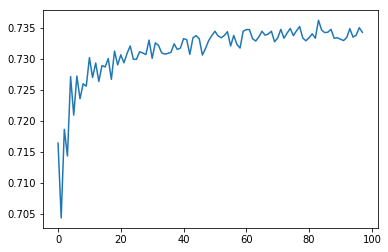

In [27]:
plt.plot(rsq_list)

### Major Injuries or Fatalities with Clusters

Still only working with some of the data (plus cluster label), no dummies

In [28]:
df['major_fatal'] = 0
df.loc[((df.majorinjuries_bicyclist>0) | (df.fatal_bicyclist>0) | 
        (df.majorinjuries_driver>0) | (df.fatal_driver>0) | 
        (df.majorinjuries_pedestrian>0) | (df.fatal_pedestrian>0)), 'major_fatal'] = 1

df.major_fatal.sum()

12312

In [29]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df[feature_cols]
y = df['major_fatal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [30]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,0,1
major_fatal,,
0,23683,460
1,2330,91


### Major Injuries or Fatalities with Upsampling and Clusters

In [31]:
# upsampling the minority (like my original modeling)
df[df.major_fatal == 1].shape[0] / df[df.major_fatal == 0].shape[0]
majors = df.loc[df.major_fatal == 1]
low_injuries = df.loc[df.major_fatal == 0]

df_majors_upsampled = resample(majors, replace=True, n_samples=120507, random_state=42)
df_upsampled = pd.concat([df_majors_upsampled, low_injuries])

In [32]:
X = df_upsampled[feature_cols]
y = df_upsampled.major_fatal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,0,1
major_fatal,,
0,9813,2390
1,626,11273


In [33]:
rfc.score(X_test, y_test)

0.8748651564185544

### Fatalities with Upsampling, Clusters

Note upsampling is on rows having eithr major injuries or fatalities, not on fatalities alone, because they are relatively few.  I will be predicting fatalities, so this may need to be reconsidered.

In [34]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df_upsampled[feature_cols]
y = df_upsampled.fatal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,False,True
fatal,,
False,23921,22
True,30,129


### Ohhhh

But wow, I just got better results!  This was surprising to me.  I'm not even sure what this means.  

In [35]:
rfc.score(X_test, y_test)

0.9978425026968716

582/11385=0.05112

38/112=0.339

### What happens if I only upsample on the fatalities

Fatalities represent 0.01 % of the rows.  Upsample by 100x to maybe make them 10% of the rows.  Risk: this also will _add major injuries_ to my majority rows, which may add noise to my fatality signal.

```df.loc[df.fatal].shape[0] / df.shape[0] = 0.001242292141937524```

In [36]:
df[df.major_fatal == 1].shape[0] / df[df.major_fatal == 0].shape[0]
fatals = df.loc[df.fatal == 1]
nonfatals = df.loc[df.fatal == 0]

df_fatals_upsampled = resample(fatals, replace=True, n_samples=12051, random_state=42)
df_fatals_upsampled = pd.concat([df_fatals_upsampled, nonfatals])

#### Try also with n_samples=1200, and with replace=False -- can that work?

In [37]:
df[df.major_fatal == 1].shape[0] / df[df.major_fatal == 0].shape[0]
fatals = df.loc[df.fatal == 1]
nonfatals = df.loc[df.fatal == 0]

df_fatals_upsampled = resample(fatals, replace=True, n_samples=12051, random_state=42)
df_fatals_upsampled = pd.concat([df_fatals_upsampled, nonfatals])

In [38]:
df_fatals_upsampled.shape

(144705, 40)

In [39]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df_fatals_upsampled[feature_cols]
y = df_fatals_upsampled.fatal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,False,True
fatal,,
False,13227,85
True,10,1149


In [40]:
rfc.score(X_test, y_test)

0.9934351461543777

In [41]:
from sklearn.metrics import confusion_matrix

df_fatals_upsampled['fatal_predictions'] = rfc.predict(X)
cm = confusion_matrix(df_fatals_upsampled.fatal, df_fatals_upsampled.fatal_predictions,
                 labels=None, sample_weight=None)
cm

array([[131947,    707],
       [   123,  11928]])

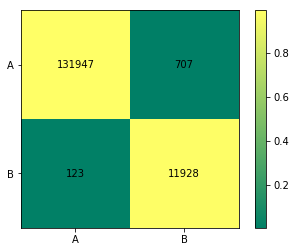

In [42]:
# credits for plot:  https://stackoverflow.com/questions/5821125/how-to-plot-confusion-matrix-with-string-axis-rather-than-integer-in-python

conf_arr = cm
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)
    
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.summer, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.savefig('fatality_confusion_matrix.png', format='png')
plt.show()

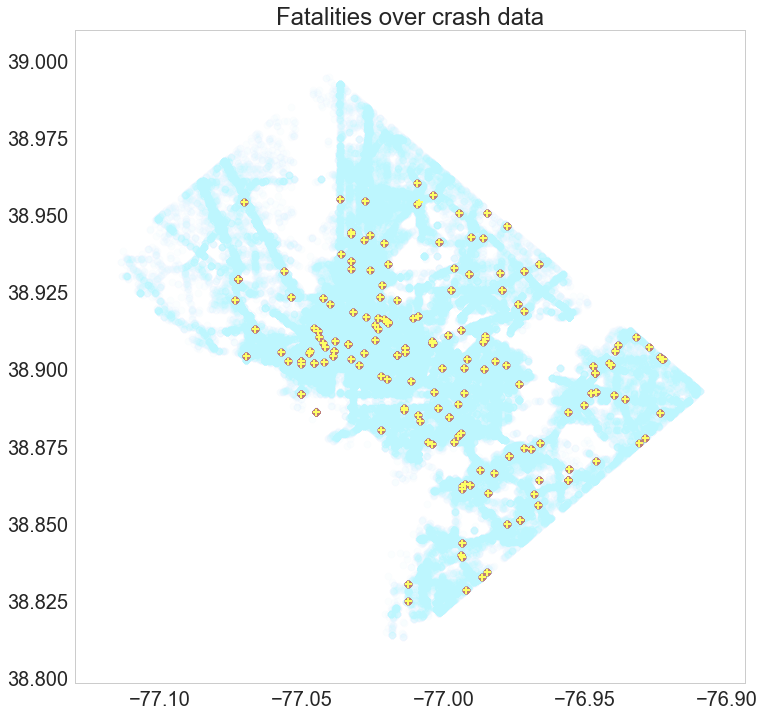

In [50]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})

font = {'size'   : 18}
plt.rc('font', **font)

plt.scatter(df_fatals_upsampled.x, df_fatals_upsampled.y, c='#bdf6fe', alpha=0.05)
true_fatals = df_fatals_upsampled.loc[df_fatals_upsampled.fatal]
pred_fatals = df_fatals_upsampled.loc[df_fatals_upsampled.fatal_predictions]
plt.scatter(pred_fatals.x, pred_fatals.y, marker = 'o', c='#c27e79', alpha = 0.05)
plt.scatter(true_fatals.x, true_fatals.y, marker = '+', linewidth=2, c='#fdff63')

plt.title('Fatalities over crash data')
plt.show()

### Feature Importances

In [51]:
df_fatals_upsampled.columns
rfc.feature_importances_

array([6.29225407e-02, 1.28645406e-02, 1.46254233e-02, 5.32504859e-02,
       3.64002927e-02, 2.58096090e-01, 2.57648078e-01, 1.70635237e-05,
       2.63024734e-03, 1.70032288e-03, 2.74959459e-01, 2.48854559e-02])

In [52]:
rfc.decision_path(X)

(<144705x120622 sparse matrix of type '<class 'numpy.int64'>'
 	with 246234070 stored elements in Compressed Sparse Row format>,
 array([     0,   1209,   2394,   3655,   4912,   6111,   7344,   8553,
          9750,  10899,  12094,  13265,  14482,  15707,  16854,  18081,
         19254,  20557,  21804,  22989,  24142,  25373,  26574,  27781,
         28946,  30135,  31368,  32577,  33820,  35037,  36202,  37449,
         38606,  39815,  41058,  42229,  43416,  44615,  45796,  46997,
         48214,  49383,  50620,  51835,  53014,  54267,  55442,  56687,
         57882,  59139,  60390,  61671,  62880,  64023,  65288,  66487,
         67802,  68999,  70150,  71389,  72604,  73793,  75006,  76199,
         77354,  78557,  79708,  80961,  82128,  83351,  84556,  85765,
         86952,  88143,  89384,  90597,  91824,  93029,  94244,  95481,
         96650,  97805,  99012, 100227, 101410, 102629, 103862, 105061,
        106286, 107455, 108664, 109833, 111038, 112301, 113490, 114681,
       

### OK -- second look

Given the insane improvement, I suspect there may be something wrong with my model.  Because of the massive amount of upsampling, maybe I should try downsampling, or maybe I should only train on half of my data and test on the other half.  

1. First, train/test evenly
1. Then, try downsampling my majority data rather than creating so much of the fatal minority.

In [53]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df_fatals_upsampled[feature_cols]
y = df_fatals_upsampled.fatal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,False,True
fatal,,
False,65981,364
True,66,5942


### Downsampling majority

In [54]:
#df[df.major_fatal == 1].shape[0] / df[df.major_fatal == 0].shape[0]
#majors = df.loc[df.major_fatal == 1]
fatals = df.loc[df.fatal == 1]
nonfatals = df.loc[df.fatal == 0]

df_fatals_downsampled = resample(nonfatals, replace=True, n_samples=165, random_state=42)
df_fatals_downsampled = pd.concat([df_fatals_downsampled, fatals])

In [55]:
df_fatals_downsampled.shape

(330, 40)

In [56]:
feature_cols = ['speeding_involved','total_pedestrians','total_bicycles',
               'total_vehicles','ward_number','x','y', 'bicyclistsimpaired',
               'driversimpaired','pedestriansimpaired','offintersection',
               'cluster']

X = df_fatals_downsampled[feature_cols]
y = df_fatals_downsampled.fatal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
pd.crosstab(y_test, predictions)

col_0,False,True
fatal,,
False,20,13
True,10,23


In [57]:
df.loc[df.fatal].shape

(165, 40)

Looking at these results, let's also look at the data itself.  
- accidents by proximity to intersection?


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


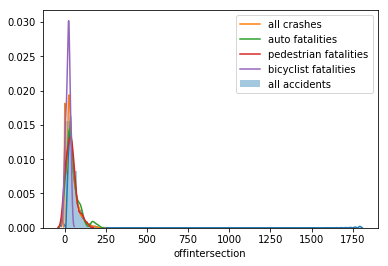

In [65]:
fatals = df.loc[df.fatal]
car_fatals = df.loc[df.fatal_driver >= 1]
bike_fatals = df.loc[df.fatal_bicyclist >= 1]
ped_fatals = df.loc[df.fatal_pedestrian >= 1]


'''df.hist(column='offintersection', range=(0,300), bins=20)
plt.title('all accidents')
plt.show()

fatals.hist(column='offintersection', range=(0,300), bins=20)
plt.title('all fatalities')
plt.show() 

car_fatals.hist(column='offintersection', range=(0,300), bins=20)
plt.title('car fatalities')
plt.show() 

bike_fatals.hist(column='offintersection', range=(0,300), bins=20)
plt.title('bicyclist fatalities')
plt.show() 

ped_fatals.hist(column='offintersection', range=(0,300), bins=20)
plt.title('pedestrian fatalities')
plt.show() 
'''

plt.rcParams['figure.figsize'] = [16.0, 16.0]

sns.distplot(df.offintersection, label='all accidents');

sns.kdeplot(df.offintersection, label='all crashes', clip=(0,300))
sns.kdeplot(car_fatals.offintersection, label="auto fatalities", clip=(0,300))
sns.kdeplot(ped_fatals.offintersection, label="pedestrian fatalities", clip=(0,300))
sns.kdeplot(bike_fatals.offintersection, label="bicyclist fatalities", clip=(0,300))


plt.legend();


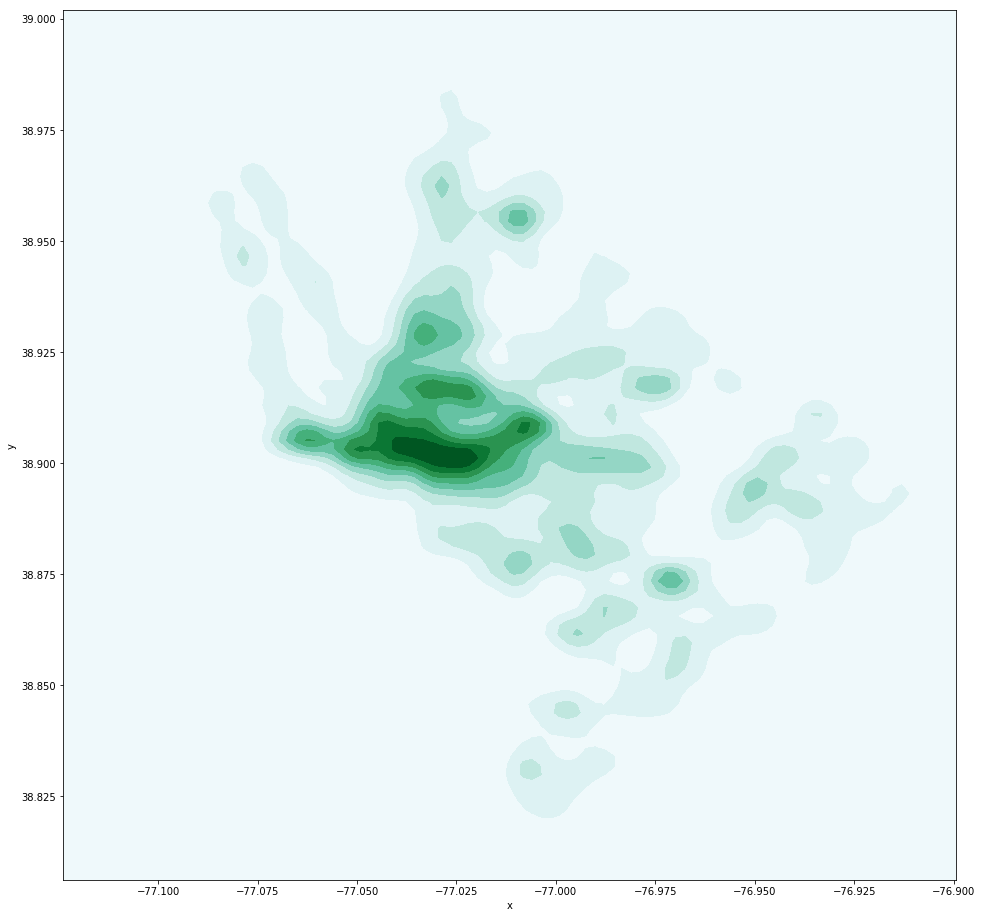

In [66]:
ax = sns.kdeplot(df.x, df.y, shade=True)

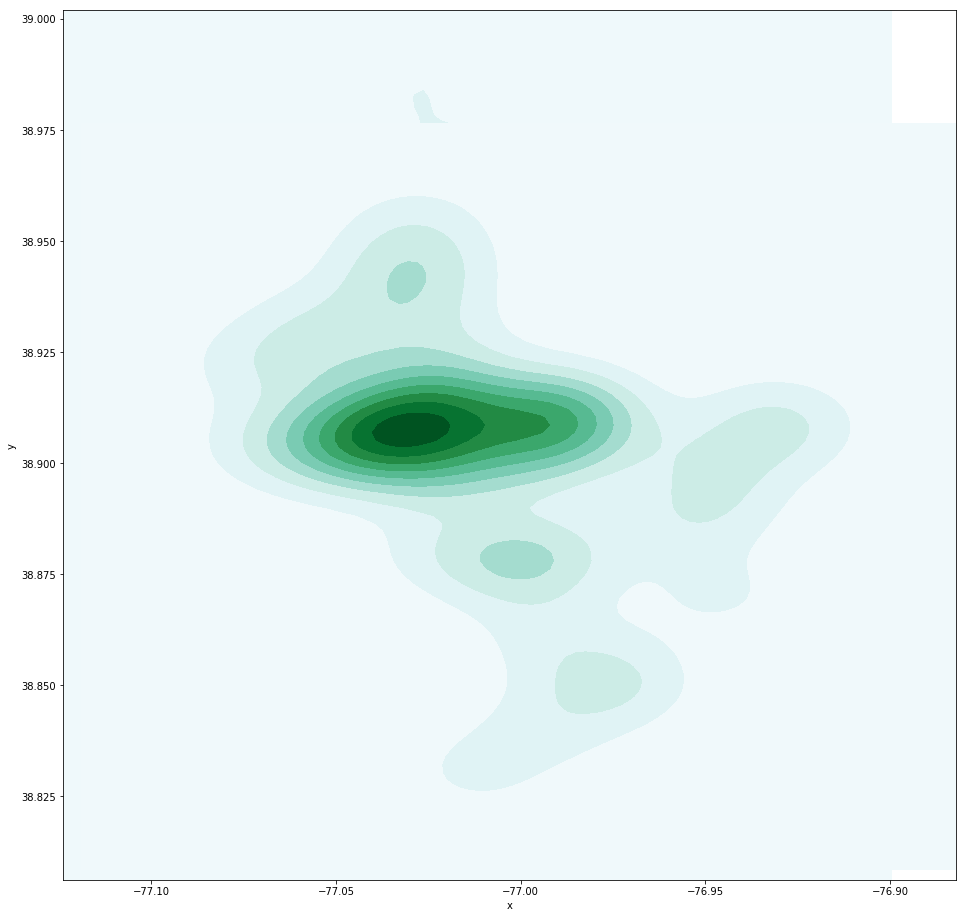

In [72]:
ax = sns.kdeplot(df.x, df.y, shade=True)
ax = sns.kdeplot(ped_fatals.x, ped_fatals.y, shade=True)

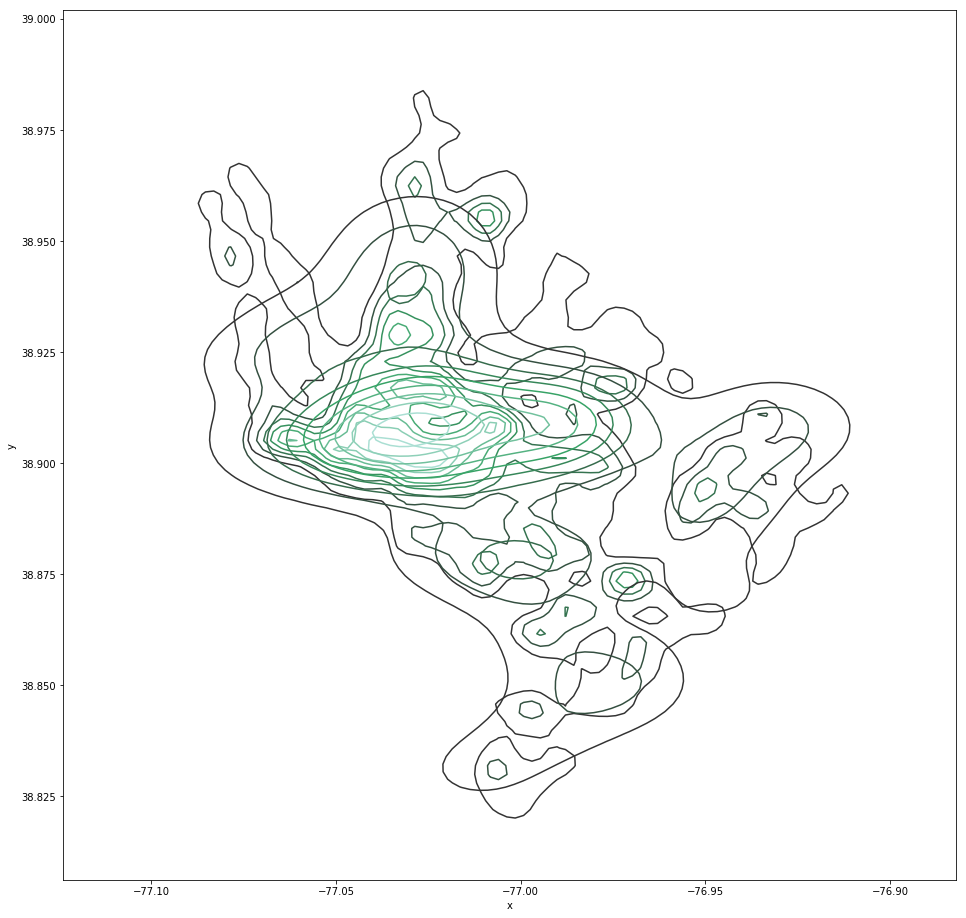

In [73]:
fig, ax = plt.subplots()
sns.kdeplot(df.x, df.y, ax=ax)
sns.kdeplot(ped_fatals.x, ped_fatals.y, ax=ax)
#sns.swarmplot(bike_fatals.x, bike_fatals.y, ax=ax)

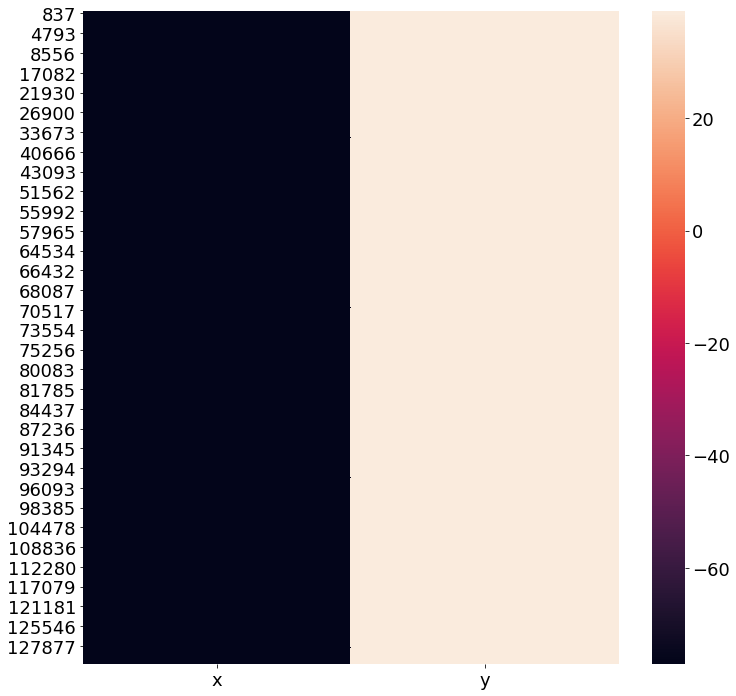

In [206]:
fatal_loc = fatals[['x','y']]
sns.heatmap(fatal_loc)

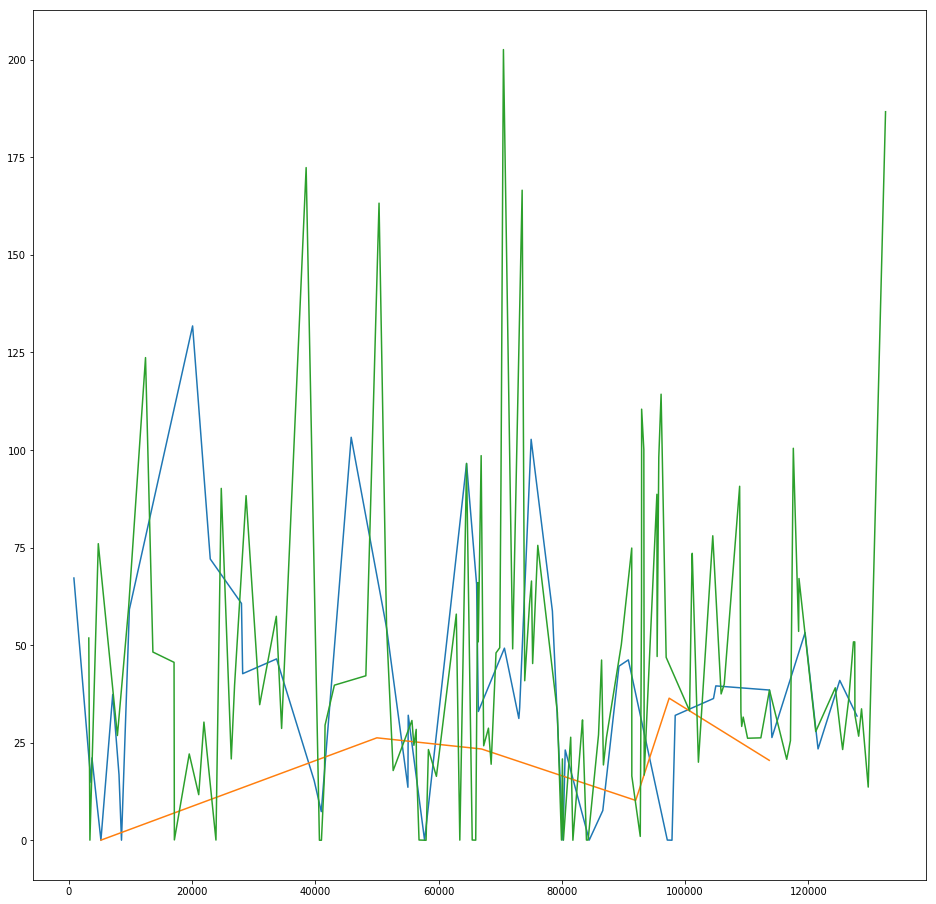

In [89]:
fatals = df.loc[df.fatal]
#plt.plot(fatals.offintersection)
plt.plot(ped_fatals.offintersection)
plt.plot(bike_fatals.offintersection)
plt.plot(car_fatals.offintersection)




#sns.pairplot(df[['fatal', 'offintersection']])

In [92]:
df.columns
print('Total crash data points: {}'.format(str(df.shape[0])))
df[['fatal', 'major_fatal', 'injuries_any']].sum()

Total crash data points: 132819


fatal             165.0
major_fatal     12312.0
injuries_any    33227.0
dtype: float64

In [109]:
# TODO

# break out year and month into new fields (duh)
# plot accidents by year and plot again by months
# maybe make some dummies out of the months or seasons
# drunk driving counts by year
# 
df.date_r.head()
#df.date_r.values.str.split('-')
#df['date_r'].map(lambda x: 1000*x.year + x.month)
df['year'] = df['date_r'].map(lambda x: x.year)
df['month'] = df['date_r'].map(lambda x: x.month)

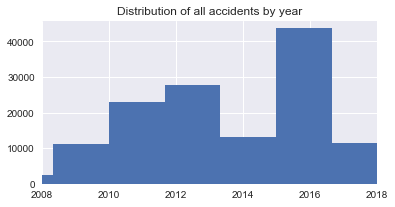

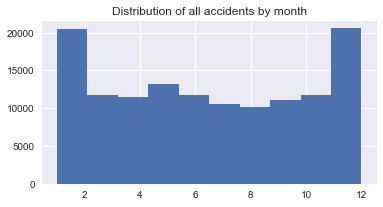

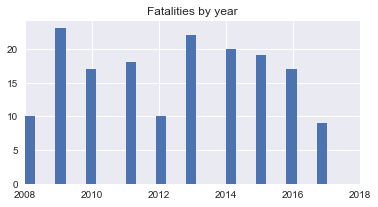

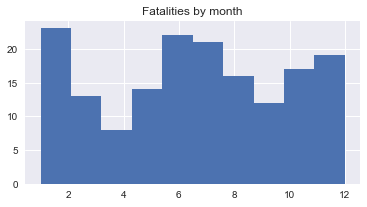

In [207]:
plt.rcParams['figure.figsize'] = [6, 3]
sns.set()

#plt.xlim((2008,2018))
#print(plt.rcParams.keys)
plt.hist(df.year, bins=30)
plt.title('Distribution of all accidents by year')
plt.xlim((2008,2018))
plt.show()

plt.hist(df.month)
plt.title('Distribution of all accidents by month')
#plt.xlim((2008,2018))
plt.show()

fatals = df.loc[df.fatal >=1]
plt.hist(fatals.year, bins=30);
plt.title('Fatalities by year')
plt.xlim((2008,2018))
plt.show()

plt.hist(fatals.month)
plt.title('Fatalities by month')
#plt.xlim((2008,2018))
plt.show()


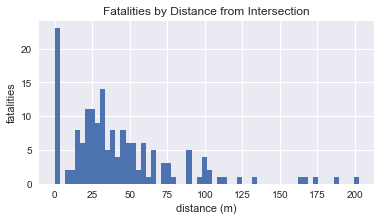

count    165.000000
mean      42.694157
std       37.587277
min        0.007204
25%       20.487304
50%       32.809292
75%       54.400527
max      202.572775
Name: offintersection, dtype: float64

In [208]:
# fatalities by distance from intersection
fatals.shape

plt.hist(fatals.offintersection, bins=60);
plt.title('Fatalities by Distance from Intersection')
plt.xlabel('distance (m)')
plt.ylabel('fatalities')
#plt.xlim((2008,2018))
plt.show()

fatals.offintersection.describe()

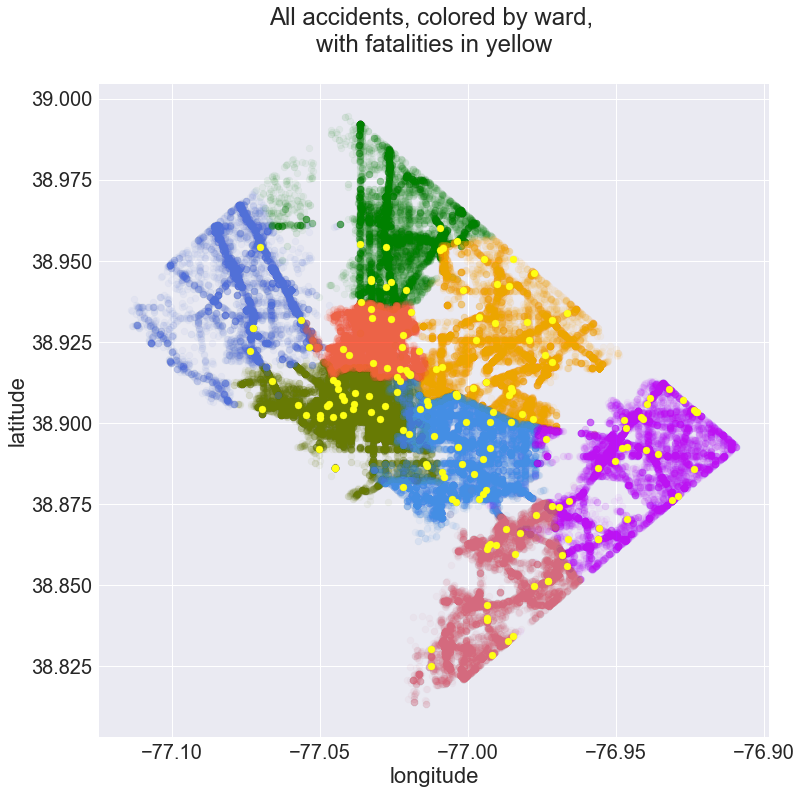

(12312, 40)


2.0    30788
6.0    20245
5.0    19497
7.0    15385
1.0    12814
8.0    12606
4.0    12222
3.0     9262
Name: ward_number, dtype: int64

In [235]:
ward1 = df.loc[df.ward_number == 1]
ward2 = df.loc[df.ward_number == 2]
ward3 = df.loc[df.ward_number == 3]
ward4 = df.loc[df.ward_number == 4]
ward5 = df.loc[df.ward_number == 5]
ward6 = df.loc[df.ward_number == 6]
ward7 = df.loc[df.ward_number == 7]
ward8 = df.loc[df.ward_number == 8]
ward9 = df.loc[df.ward_number == 9]

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
sns.set(font_scale = 2)

#plt.axes(labelsize='large')
#fig = plt.figure()
#axes.titlesize      : large   # fontsize of the axes title
#axes.labelsize      : medium  # fontsize of the x any y labels
font = {'size'   : 18}

plt.rc('font', **font)

plt.scatter(ward1.x, ward1.y, c='tomato', alpha=.05)
plt.scatter(ward2.x, ward2.y, c='#677a04', alpha=.05)  # olive green
plt.scatter(ward3.x, ward3.y, c='#5170d7', alpha=.05)  # cornflower blue
plt.scatter(ward4.x, ward4.y, c='green', alpha=.05)
plt.scatter(ward5.x, ward5.y, c='orange', alpha=.05)
plt.scatter(ward6.x, ward6.y, c='#448ee4', alpha=.05) # lt purple
plt.scatter(ward7.x, ward7.y, c='#bc13fe', alpha=.05)
plt.scatter(ward8.x, ward8.y, c='#d46a7e', alpha=.05)
plt.scatter(ward1.x, ward1.y, c='tomato', alpha=.05)

plt.scatter(fatals.x, fatals.y, marker='o', c='#ffff14')

plt.title('All accidents, colored by ward, \nwith fatalities in yellow\n')
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.rcParams["axes.labelsize"] = 18


plt.savefig('All_accidents_colored_by_ward_with_fatals_in_yellow.png')
plt.show();

print(majors.shape)
df.ward_number.value_counts()

(12312, 40)


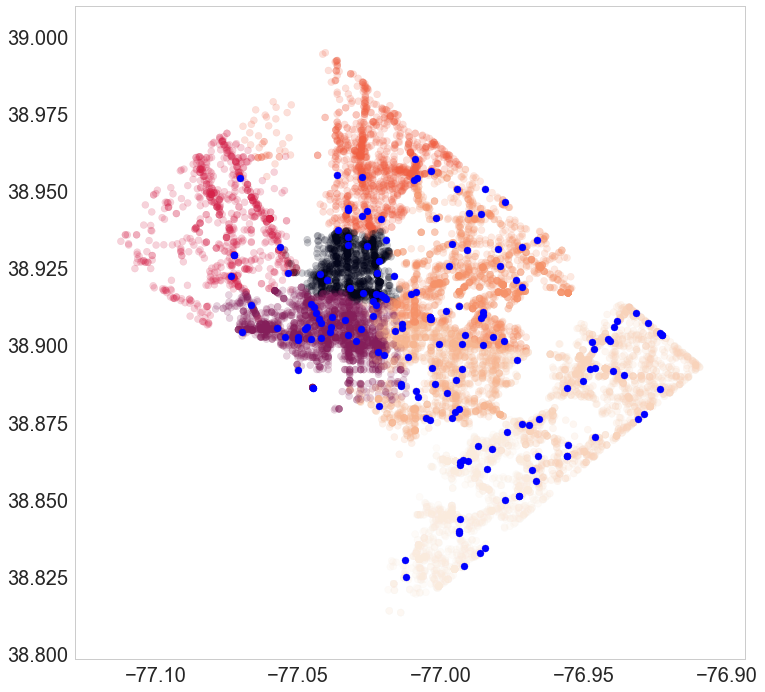

In [239]:
#import matplotlib.pyplot as plt # unsetting sns
sns.set_style("whitegrid", {'axes.grid' : False})
#plt.scatter(majors.x, majors.y, marker='o', c='#b04e0f', alpha=0.2)
plt.scatter(majors.x, majors.y, marker='o', c=np.log(majors.ward_number), alpha=0.2)
plt.scatter(fatals.x, fatals.y, marker='o', c='blue')

print(majors.shape)
plt.show();


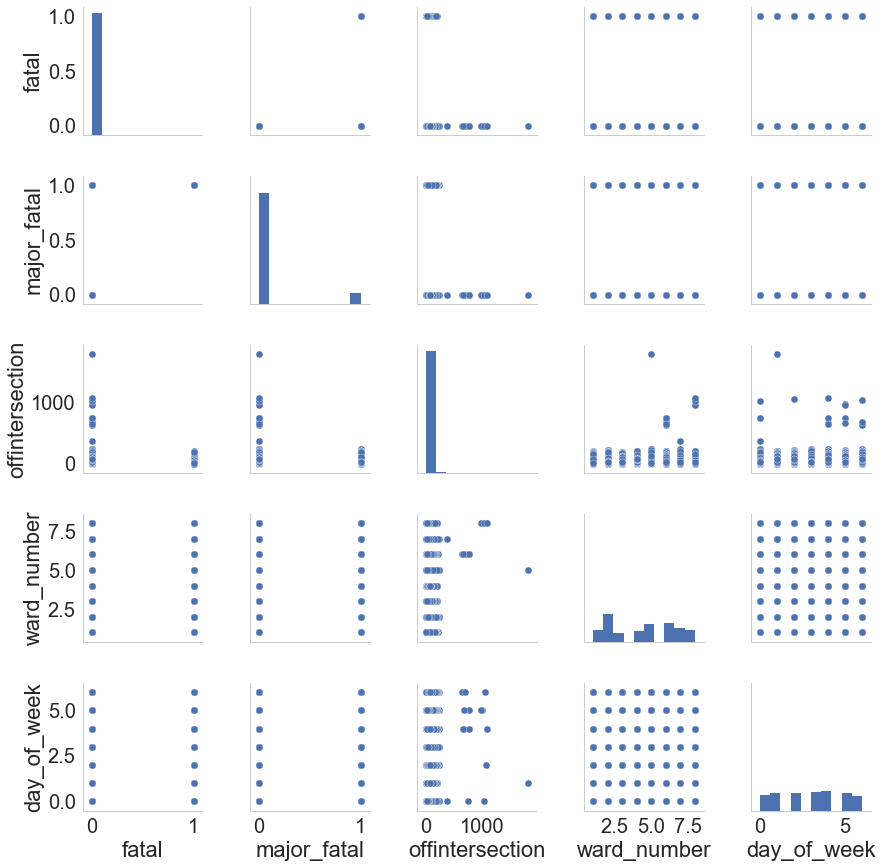

In [260]:
foo = df[['major_fatal','offintersection','ward_number','day_of_week','fatal_bicyclist',
         'fatal_driver','fatal_pedestrian']].copy(deep=True)
foo['fatal'] = 0
foo['fatal'] = np.where(((foo.fatal_bicyclist > 0) | 
                        (foo.fatal_driver > 0) | 
                        (foo.fatal_pedestrian > 0)), 1, 0) #, df.fatal_driver > 0, 1, df.fatal_pedestrian > 0, 1)

sns.pairplot(foo[['fatal','major_fatal','offintersection','ward_number','day_of_week']])


In [255]:
foo.head()

,major_fatal,offintersection,ward_number,day_of_week,fatal_bicyclist,fatal_driver,fatal_pedestrian,fatal
0,1,0.076475,5.0,0,0.0,0.0,0.0,0
1,0,0.042201,2.0,0,0.0,0.0,0.0,0
2,0,2.911309,4.0,3,0.0,0.0,0.0,0
3,0,21.374920,4.0,1,0.0,0.0,0.0,0
4,0,0.086942,5.0,2,0.0,0.0,0.0,0


/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


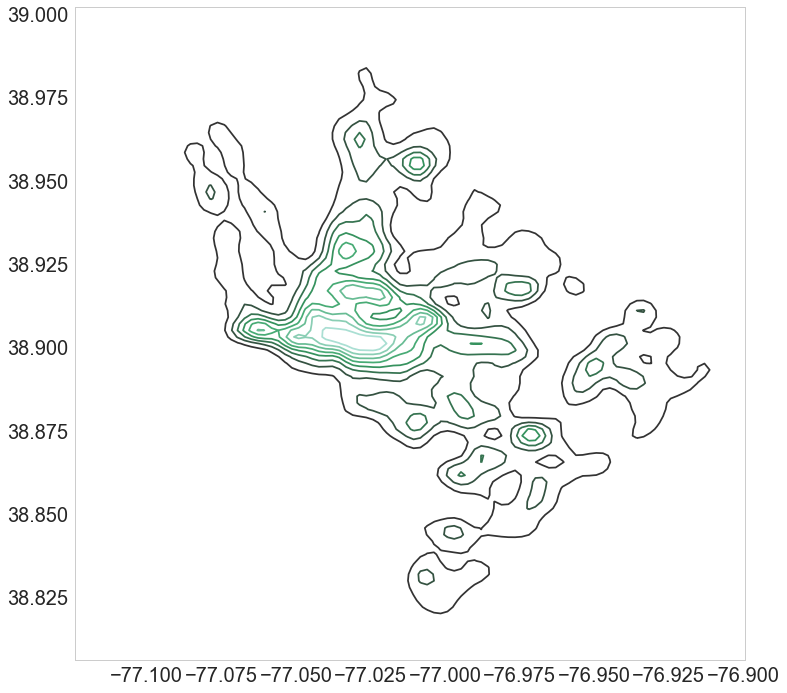

In [261]:
# Plot major injuries and fatalities as a heatmap
df_major = df.loc[df.major_fatal >= 0].copy(deep=True)
sns.kdeplot(df[['x','y']])

In [ ]:
cmap = sns.cubehelix_palette(start=1, light=1, as_cmap=True)
sns.kdeplot(df_major.x, df_major.y, cmap=cmap, shade=True, cut=5)